Notebook based on Elise's version

In [1]:
import datetime as dt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from salishsea_tools import evaltools as et
from salishsea_tools import viz_tools

%matplotlib inline

In [4]:
# path to model files:
PATH = '/results2/SalishSea/nowcast-green.201905/'

# start and end dates for analysis:
start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2016, 2, 9)

# number of days per model file:
flen = 1

# dictionary mapping desired model variables to the file types where they are found
filemap = {'vosaline': 'grid_T', 'votemper': 'grid_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict = {'ptrc_T': 1, 'grid_T': 1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt = 'nowcast'

In [5]:
# load DFO CTD data (returns pandas dataframe)
# SA is Absolute (actually reference) Salinity, and CT is Conservative Temperature
df1 = et.loadDFOCTD(datelims=(start_date, end_date))
print(len(df1))
df1.head()

2137


,Year,Month,Day,Hour,Lat,Lon,Z,SA,CT,dtUTC
0,2016.0,2.0,9.0,7.674722,48.615667,-123.2475,2.280561,30.038608,8.651153,2016-02-09 07:40:29
1,2016.0,2.0,9.0,7.674722,48.615667,-123.2475,2.974640,30.035661,8.650427,2016-02-09 07:40:29
2,2016.0,2.0,9.0,7.674722,48.615667,-123.2475,4.065331,30.034203,8.649940,2016-02-09 07:40:29
3,2016.0,2.0,9.0,7.674722,48.615667,-123.2475,4.957710,30.060889,8.656276,2016-02-09 07:40:29
4,2016.0,2.0,9.0,7.674722,48.615667,-123.2475,5.949237,30.065565,8.657313,2016-02-09 07:40:29


In [6]:
# match model output to observations and return both in a dataframe
# the model variables will have their original names prefixed by mod_, eg mod_vosaline
# the observation file names are unchanged. 
data = et.matchData(data=df1, filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)
data

,Year,Month,Day,Hour,Lat,Lon,Z,SA,CT,dtUTC,j,i,mod_vosaline,mod_votemper,k
0,2016.0,1.0,6.0,19.0225,49.293245,-124.021762,0.9,27.710909,7.128306,2016-01-06 19:01:21,515,210,27.435623,5.901307,0
1,2016.0,1.0,6.0,19.0225,49.293245,-124.021762,2.1,27.712252,7.120417,2016-01-06 19:01:21,515,210,27.435272,5.900829,2
2,2016.0,1.0,6.0,19.0225,49.293245,-124.021762,2.9,27.714113,7.124358,2016-01-06 19:01:21,515,210,27.435272,5.900829,2
3,2016.0,1.0,6.0,19.0225,49.293245,-124.021762,3.9,27.722405,7.134069,2016-01-06 19:01:21,515,210,27.435162,5.900728,3
4,2016.0,1.0,6.0,19.0225,49.293245,-124.021762,4.9,27.747668,7.172108,2016-01-06 19:01:21,515,210,27.435167,5.900748,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2016.0,1.0,14.0,19.6525,49.332932,-123.996940,376.5,31.359899,9.835818,2016-01-14 19:39:09,521,219,31.475222,9.798003,37
1732,2016.0,1.0,14.0,19.6525,49.332932,-123.996940,377.3,31.360920,9.842121,2016-01-14 19:39:09,521,219,31.475222,9.798003,37
1733,2016.0,1.0,14.0,19.6525,49.332932,-123.996940,378.3,31.362347,9.848393,2016-01-14 19:39:09,521,219,31.475222,9.798003,37
1734,2016.0,1.0,14.0,19.6525,49.332932,-123.996940,379.5,31.363678,9.850437,2016-01-14 19:39:09,521,219,31.475222,9.798003,37


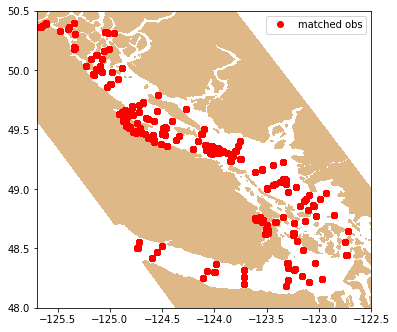

In [52]:
# plot matched data locations
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords='map')
ax.plot(data['Lon'], data['Lat'], 'ro', label='matched obs')
bathy = '/home/sallen/MEOPAR/grid/bathymetry_201702.nc'
viz_tools.plot_land_mask(ax, bathy, coords='map', color='burlywood')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

In [53]:
# create dictionary of dataframe views by year
datyr = {}
yy = np.array([ii.year for ii in data['dtUTC']])
yys = np.unique(yy)
for yr in np.unique(yy):
    datyr[yr] = data.loc[yy]

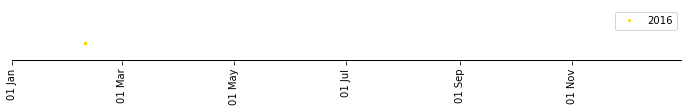

In [54]:
# plot matched data sampling times
clist = ('gold', 'aqua', 'plum', 'c', 'm', 'r', 'g', 'b',  'brown','gray')
fig, axL = plt.subplots(1, 1, figsize=(12, 1))
for ii, yr in enumerate(yys):
    dshift = dt.datetime(yys[0], 1, 1) - dt.datetime(yr, 1, 1)
    axL.plot(datyr[yr].dtUTC + dshift, np.zeros(datyr[yr].dtUTC.shape) + 0.1 * ii, '.',
             color=clist[ii], markersize=4, label=str(yr))
axL.set_yticks([])
yearsFmt = mdates.DateFormatter('%d %b')
axL.xaxis.set_major_formatter(yearsFmt)
axL.xaxis.set_ticks([dt.datetime(int(yys[0]), 1, 1), dt.datetime(int(yys[0]), 3, 1), dt.datetime(int(yys[0]), 5, 1), 
                     dt.datetime(int(yys[0]), 7, 1),
                     dt.datetime(int(yys[0]), 9, 1),dt.datetime(int(yys[0]), 11, 1), dt.datetime(int(yys[0])+1, 1, 1)])
for tick in axL.get_xticklabels():
        tick.set_rotation(90)
        tick.set_horizontalalignment('center')

axL.set_ylim(-0.1, 0.1*(len(datyr.keys()) + 1))
axL.set_xlim(dt.datetime(yys[0], 1, 1), dt.datetime(yys[0], 12, 31))
axL.legend();
axL.set_frame_on(False)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));

#### Display stats

In [55]:
print('CT:')
et.printstats(data.loc[:], 'CT', 'mod_votemper')
print('SA:')
et.printstats(data.loc[:], 'SA', 'mod_vosaline')

CT:
  N: 90946
  bias: -0.08334274459062385
  RMSE: 0.38189412450767063
  WSS: 0.9638351717153325
SA:
  N: 90946
  bias: 0.15792155556050957
  RMSE: 0.4877281764689603
  WSS: 0.9690926188489902


### mod vs. obs plots

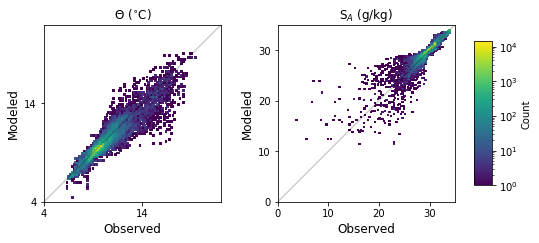

In [56]:
fig = plt.figure(figsize = (7.5, 3.25))
gs1 = gridspec.GridSpec(1, 4, left=.08, right=0.91, bottom=0.1, top=0.97,
                      wspace=0.2, width_ratios=[1, 0.1, 1, 0.1])
axT = fig.add_subplot(gs1[0, 0])
axS = fig.add_subplot(gs1[0, 2])
gscb = gridspec.GridSpecFromSubplotSpec(7, 1, subplot_spec=gs1[:, 3])
axcb = fig.add_subplot(gscb[1:-1])

axS.plot((0,36), (0,36), 'k-', alpha=0.2)
axT.plot((0,25), (0,25), 'k-', alpha=0.2)

iiT = (~np.isnan(data['CT'])) & (~np.isnan(data['mod_votemper']))
iiS = (~np.isnan(data['SA'])) & (~np.isnan(data['mod_vosaline']))
counts, xedges, yedges, m1 = axT.hist2d(data.loc[iiT,['CT']].values.flatten(),
                                      data.loc[iiT,['mod_votemper']].values.flatten(), bins=25*3, norm=LogNorm())
counts, xedges, yedges, m2 = axS.hist2d(data.loc[iiS,['SA']].values.flatten(),
                                      data.loc[iiS,['mod_vosaline']].values.flatten(), bins=36*3, norm=LogNorm())

cb = fig.colorbar(m1, cax=axcb)
cb.set_label('Count')

Smax = 35
ntick = np.arange(0, Smax, 10)
ntickl = [str(i) for i in ntick]
axS.set_xlim((0, Smax))
axS.set_ylim((0, Smax))
axS.set_xticks(ntick)
axS.set_xticklabels(ntickl)
axS.set_yticks(ntick)
axS.set_yticklabels(ntickl)
    
Tmax = 22
Tmin = 4
stick=np.arange(Tmin, Tmax, 10)
stickl=[str(i) for i in stick]
axT.set_xlim((Tmin, Tmax))
axT.set_ylim((Tmin, Tmax))
axT.set_xticks(stick)
axT.set_xticklabels(stickl)
axT.set_yticks(stick)
axT.set_yticklabels(stickl)
    
for ax in (axT,axS):
    ax.set_aspect(1, adjustable='box')
    
axT.set_ylabel('Modeled', fontsize=12)
axS.set_ylabel('Modeled', fontsize=12)
axT.set_xlabel('Observed', fontsize=12)
axS.set_xlabel('Observed', fontsize=12)

axS.set_title('S$_A$ (g/kg)', fontsize=12)
axT.set_title('$\Theta$ ($^{\circ}$C)', fontsize=12);
plt.savefig('firsthalf2016_201905.png')

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


,Year,Month,Day,Hour,Lat,Lon,Z,SA,CT,dtUTC,j,i,mod_vosaline,mod_votemper,k
3103,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,1.983064,27.781182,18.597741,2015-02-08 14:40:00,388,216,28.111197,8.736908,1
3104,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,2.974589,27.895084,18.202526,2015-02-08 14:40:00,388,216,28.116211,8.738194,2
3105,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,3.966109,27.968592,17.800781,2015-02-08 14:40:00,388,216,28.259295,8.774963,3
3106,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,4.957624,28.025620,17.413308,2015-02-08 14:40:00,388,216,28.372120,8.814754,4
3107,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,5.949134,28.012712,17.381488,2015-02-08 14:40:00,388,216,28.437044,8.834276,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,63.448500,29.725982,12.325756,2015-02-08 14:40:00,388,216,29.154045,9.135362,24
3166,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,64.439726,29.729217,12.320631,2015-02-08 14:40:00,388,216,29.154045,9.135362,24
3167,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,65.430948,29.748228,12.294041,2015-02-08 14:40:00,388,216,29.154045,9.135362,24
3168,2015.0,2.0,8.0,14.666667,48.805033,-123.57035,66.422165,29.784622,12.240119,2015-02-08 14:40:00,388,216,29.154045,9.135362,24


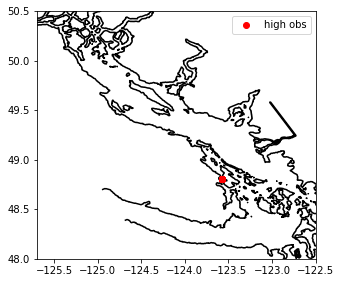

In [10]:
## where is that weird point from?
fig, ax = plt.subplots(figsize = (5,5))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data.loc[((data.mod_votemper-data.CT)<-3),['Lon']], data.loc[((data.mod_votemper-data.CT)<-3),['Lat']], 'ro',label='high obs')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);
data.loc[(data.mod_votemper-data.CT)<-3]

### Alternatively, color by depth (Z), or other variable:

Text(0.5, 1.0, '$\\Theta$ ($^{\\circ}$C)')

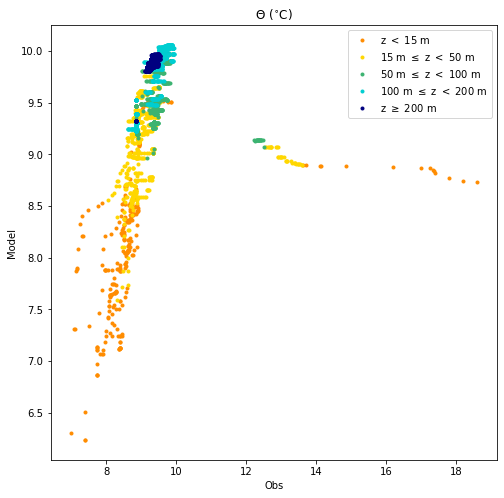

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'CT','mod_votemper','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('$\Theta$ ($^{\circ}$C)')